In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [5]:
X, y = make_blobs(
    n_samples=200,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1
)

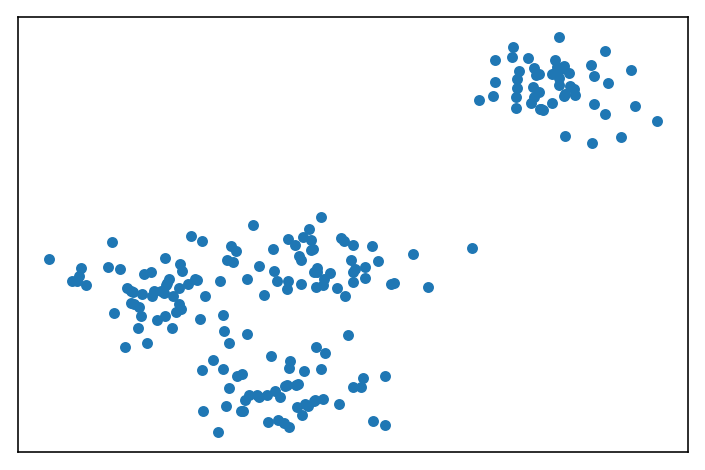

In [6]:
plt.figure(figsize=(6, 4), dpi=144)
plt.xticks(())
plt.yticks(())
plt.scatter(X[:, 0], X[:, 1], s=20, marker='o')

In [7]:
from sklearn.cluster import KMeans

In [8]:
n_clusters = 3
kmean = KMeans(n_clusters=n_clusters)
kmean.fit(X)
print('kmean: k={}, cost={}'.format(n_clusters, int(kmean.score(X))))

kmean: k=3, cost=-668


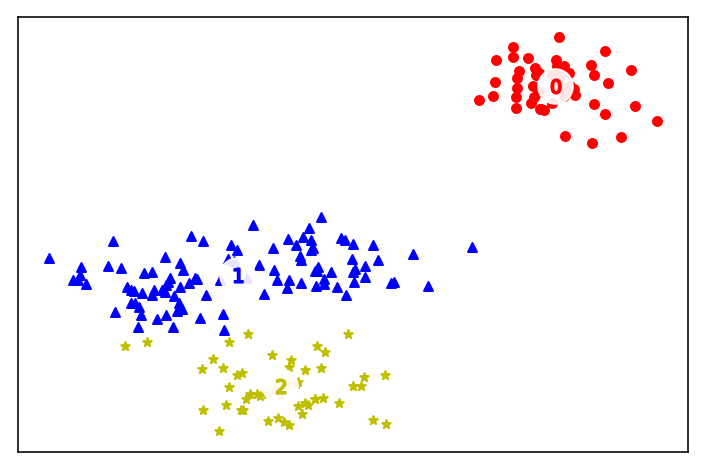

In [9]:
labels = kmean.labels_
centers = kmean.cluster_centers_
markers = ['o', '^', '*']
colors = ['r', 'b', 'y']
plt.figure(figsize=(6, 4), dpi=144)
plt.xticks(())
plt.yticks(())
for c in range(n_clusters):
    cluster = X[labels == c]
    plt.scatter(cluster[:, 0], cluster[:, 1], marker=markers[c], s=20, c=colors[c])
plt.scatter(centers[:, 0], centers[:, 1], marker='o', c='white', alpha=0.9, s=300)
for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, c=colors[i])

In [10]:
def fit_plot_kmean_model(n_clusters, X):
    plt.xticks(())
    plt.yticks(())
    
    kmean = KMeans(n_clusters=n_clusters)
    kmean.fit_predict(X)
    
    labels = kmean.labels_
    centers = kmean.cluster_centers_
    markers = ['o', '^', '*', 's']
    colors = ['r', 'b', 'y', 'k']
    
    score = kmean.score(X)
    plt.title('k={}, score={}'.format(n_clusters, (int)(score)))
    
    for c in range(n_clusters):
        cluster = X[labels == c]
        plt.scatter(cluster[:, 0], cluster[:, 1], marker=markers[c], s=20, c=colors[c])
        
    plt.scatter(centers[:, 0], centers[:, 1], marker='o', c='white', alpha=0.9, s=300)
    for i, c in enumerate(centers):
        plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, c=colors[i])

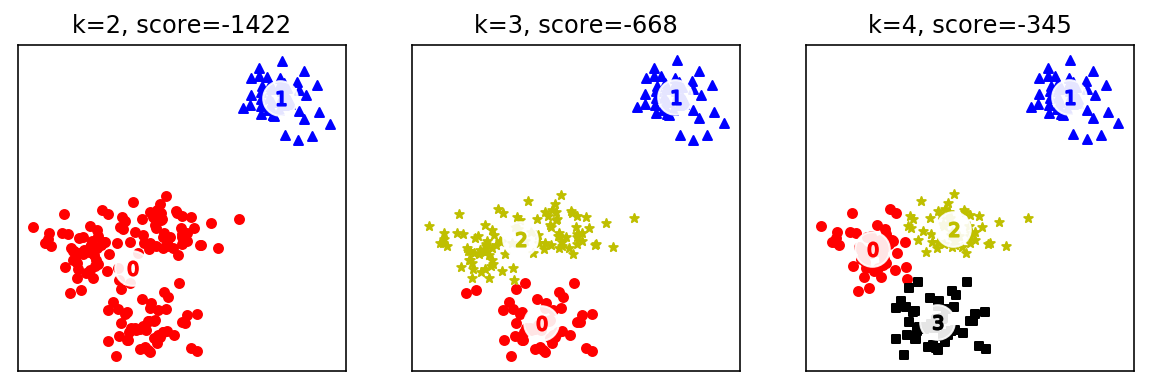

In [11]:
n_clusters = [2, 3, 4]
plt.figure(figsize=(10, 3), dpi=144)
for i, c in enumerate(n_clusters):
    plt.subplot(1, 3, i+1)
    fit_plot_kmean_model(c, X)